**Step 1: Generate two attributes: A and B. A and B have a "hide" linear dependence**


Dataset:

           A           B
0  22.335837   68.421444
1  61.952356  141.750629
2  42.823683   69.561654
3  60.783704  129.175067
4  46.019744   63.441237


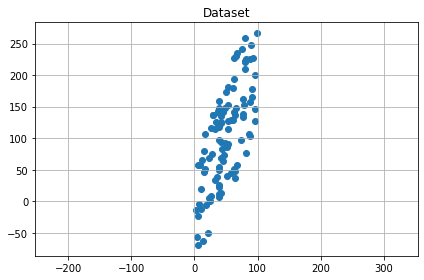

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Dataset with 2 attributes
df = pd.DataFrame(columns=['A', 'B'])

#B = mA + b + noise
m = 2
b = 5
noise =100

#Generate 100 (A,B) points
for i in range(100):
  x = np.random.uniform(0, 100)
  df = df.append({'A': x, 'B': m*x + b + np.random.uniform(-noise, noise)}, ignore_index=True)
    
print("\nDataset:\n")
print(df.head(5))

'''
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df, columns=['A', 'B'])
'''

# Plot dataset
plt.scatter(df['A'], df['B'])
plt.title("Dataset")
plt.grid(True)
plt.axis('equal');
plt.tight_layout()
plt.show()



**Step 2: Using PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

print("\nPrincipal components:\n")
print(pca.components_)

print("\nExplained Variance:\n")
print(pca.explained_variance_)


Principal components:

[[-0.24609269 -0.9692463 ]
 [ 0.9692463  -0.24609269]]

Explained Variance:

[6509.09954596  304.63995172]


**Step 3: Plot Principal Components**

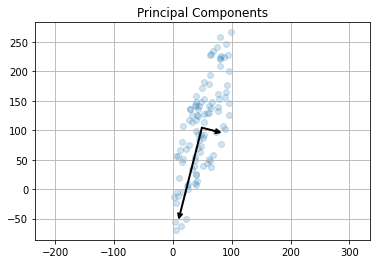

In [ ]:
def drawPrincipalComponent(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df['A'], df['B'], alpha=0.2)

for length, vector in zip(pca.explained_variance_ , pca.components_):
    v = vector * 2 * np.sqrt(length)
    drawPrincipalComponent(pca.mean_, pca.mean_ + v)

plt.grid()   
plt.title("Principal Components") 
plt.axis('equal');

**Step 4: Original Data vs. Projected Data**


Original Dataset:

           A           B
0  22.335837   68.421444
1  61.952356  141.750629
2  42.823683   69.561654
3  60.783704  129.175067
4  46.019744   63.441237

Centered Dataset:

           A          B
0 -27.102415 -36.047915
1  12.514104  37.281269
2  -6.614569 -34.907706
3  11.345452  24.705708
4  -3.418508 -41.028122

New Dataset (after PCA transformation from centered dataset):

[[ 41.60901453 -17.39778686]
 [-39.21436203   2.9546015 ]
 [ 35.46196143   2.17938477]
 [-26.73794891   4.91664365]
 [ 40.60762489   6.78334468]]

Inverse PCA transformation:

[[ 22.3358369   68.42144396]
 [ 61.95235606 141.7506286 ]
 [ 42.82368288  69.56165362]
 [ 60.7837041  129.17506713]
 [ 46.01974382  63.44123749]]




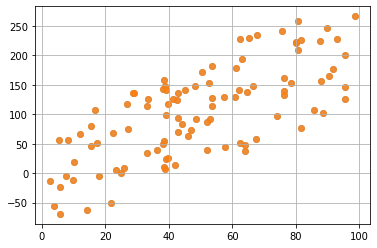

In [ ]:
print("\nOriginal Dataset:\n")
print(df.head())

print("\nCentered Dataset:\n")
df2=df-df.mean()
print(df2.head())

print("\nNew Dataset (after PCA transformation from centered dataset):\n")
df_pca = pca.transform(df)
print(df_pca[:5])

print("\nInverse PCA transformation:\n")
X_new = pca.inverse_transform(df_pca)
print(X_new[:5])

print("\n")
plt.scatter(df['A'], df['B'], alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.grid()   
#plt.axis('equal');


**PCA: Covariance Matrix and Eingenvalues and Eigenvectors**

In [ ]:
from numpy import linalg as LA

df2=df-df.mean() #Center data

#Covariance Matrix
CovM = df2.cov()
print("\nCovariance Matrix: \n")
print(CovM)

#Eigenvalues and Eigenvectors
evalue, evector = LA.eig(CovM)

print("\nEigenvectors: \n")
print(evector)

print("\nEigenvalues: \n")
print(evalue)



Covariance Matrix: 

             A            B
A   680.392023  1479.915175
B  1479.915175  6133.347474

Eigenvectors: 

[[-0.9692463  -0.24609269]
 [ 0.24609269 -0.9692463 ]]

Eigenvalues: 

[ 304.63995172 6509.09954596]
